In [2]:
# Step 1: Install and import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 2: Load dataset (after manually uploading the dataset ZIP to Colab)
from zipfile import ZipFile

dataset_zip = "/content/fer_dataset.zip"  # Upload this manually
with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# Step 3: Set up data generators
IMG_SIZE = (48, 48)
train_dir = '/content/data/images/train'
val_dir = '/content/data/images/validation'

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=IMG_SIZE, color_mode='grayscale', class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=IMG_SIZE, color_mode='grayscale', class_mode='categorical')

# Step 4: Define and train model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=15)
model.save("emotion_model.h5")


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3340 - loss: 1.6839 - val_accuracy: 0.4615 - val_loss: 1.4224
Epoch 2/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4814 - loss: 1.3668 - val_accuracy: 0.5045 - val_loss: 1.3029
Epoch 3/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5369 - loss: 1.2220 - val_accuracy: 0.5238 - val_loss: 1.2617
Epoch 4/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5854 - loss: 1.1131 - val_accuracy: 0.5234 - val_loss: 1.2632
Epoch 5/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6180 - loss: 1.0166 - val_accuracy: 0.5456 - val_loss: 1.2438
Epoch 6/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6689 - loss: 0.9002 - val_accuracy: 0.5468 - val_loss: 1.2659
Epoch 7/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7139 - loss: 0.7902 - val_accuracy: 0.5434 - val_loss: 1.3474
Epoch 8/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7553 - loss: 0.6791 - val_accurac

Saving 0.jpg to 0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


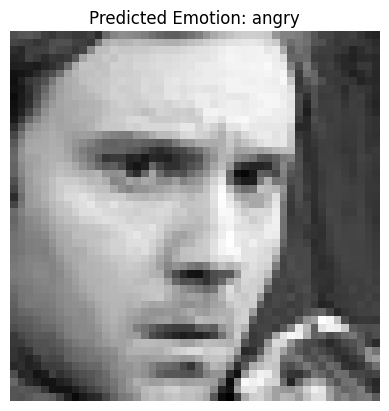

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files
import cv2

# Load the trained model
model = load_model("emotion_model.h5")
emotion_labels = list(train_gen.class_indices.keys())

# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, IMG_SIZE)
    img_normalized = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(np.expand_dims(img_normalized, axis=-1), axis=0)

    prediction = model.predict(img_input)
    predicted_label = emotion_labels[np.argmax(prediction)]

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_label}")
    plt.axis('off')
    plt.show()
